In [209]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tabulate import tabulate
from scipy.linalg import svd

In [210]:
def show(image):
    """Show an image"""
    img = plt.imshow(image, cmap='gray', vmin=0, vmax=1)
    plt.axis("off")
    plt.show()


def to_gray(image):
    """Convert a four channel image to gray"""
    return cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)


def printf(matrix, decimals=1):
    """Print a formatted matrix"""
    print(tabulate(np.around(matrix, decimals=decimals)))


def print_svd(svd_result):
    U, s, VT = svd_result
    print("=== U ===")
    printf(U)
    print("=== sigma ===")
    printf(np.diag(s))
    print("=== V transpose ===")
    printf(VT)


def product_svd(svd_result):
    U, s, VT = svd_result
    return np.dot(U, np.dot(np.diag(s), VT))

(32, 32)


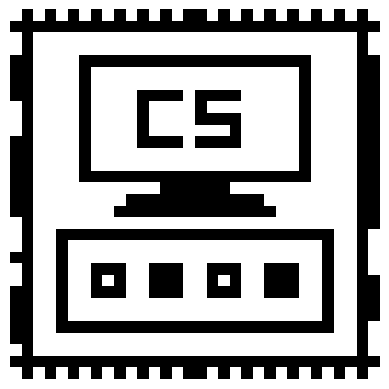

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -
1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1
1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1
0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0
0  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0
0  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0
0  0  1  1  1  1  0  1  1  1  1  0  0  0  0  1  0  0  0  0  1  1  1  1  1  0  1  1  1  1  0  0
1  0  1  1  1  1  0  1  1  1  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0
1  0  1  1  1  1  0  1  1  1  1  0  1  1  1  1  0 

In [211]:
watermark = to_gray(imread('images/watermark.png'))
print(watermark.shape)
show(watermark)
printf(watermark)

(512, 512)


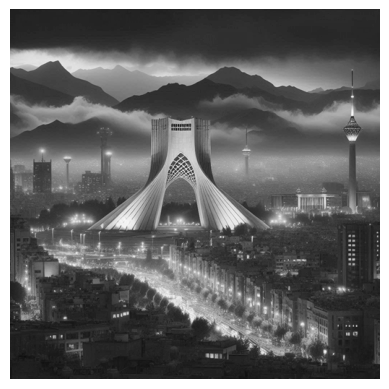

In [212]:
image = to_gray(imread('images/tehran.png'))
image = cv2.resize(image, (512, 512))
print(image.shape)
show(image)

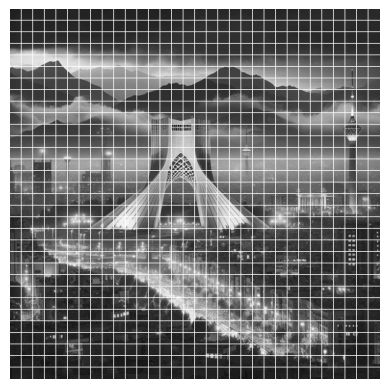

In [213]:
grid = np.copy(image)
grid[:,15:-1:16] = 1
grid[15:-1:16, :] = 1
show(grid)

In [214]:
def extract_features(image):
    extracted_features = np.zeros((image.shape[0]//16,image.shape[0]//16))

    for i in range(image.shape[0]//16):
        for j in range(image.shape[0]//16):
            block = image[16*i:16*(i+1),16*j:16*(j+1)]
            u, s, vt = svd(block)
            feature = sum(s > 0.0001)
            extracted_features[i,j] = feature

    return extracted_features
    

In [215]:
def extract_watermark(image):
    extracted_watermark = np.zeros((image.shape[0]//16, image.shape[0]//16))
    extracted_features = extract_features(image)

    for i in range(image.shape[0]//16):
        for j in range(image.shape[0]//16):
            extracted_watermark[i, j] = extracted_features[i, j] % 2

    return extracted_watermark

==== extracted features ====
--  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --
10   5   6   3   6   4   4   7   7   6  12   9   7  12  10   6   7   8   7   7  11   5   5   5   4   4  11  12  11   7   7  10
 9   4   6   7   4   4   5   4   8  10   7   8   9   9  11  12   9  11   8  11   6  10   9   8   4   4   4   3   2   3   3   8
13  10   6   5   5   6   9   5   6   5  14   7   7   7  13   7   5   6   2   1   1   4   7   5   6   6   7   4   8   5   6   4
15  16  15  15  15  16  16  15  16  16  16  16  15  14  13  12  12  12   7   8   8   8   5  13  12  10  12  13   8  11  10  11
16  16  15  15  16  16  16  15  16  16  16  16  16  16  16  15  16  15  16  16  16  16  16  16  15  15  16  16  16  16  16  16
16  16  15  14  14  16  16  16  15  15  15  16  16  16  16  16  15  15  15  15  15  15  16  16  16  16  16  16  15  16  15  16
13  13  15  13  12  15  13  15  12  13  12  15  16  16  16  16  13  15  16  15  15

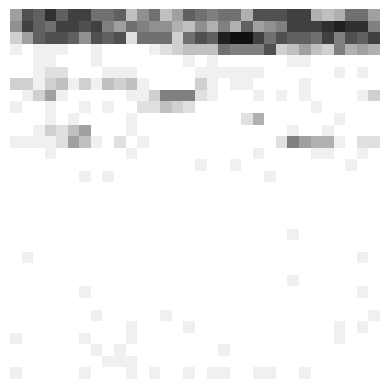

==== extracted watermark ====


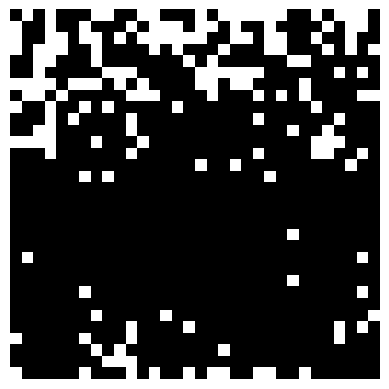

In [216]:
extracted_features = extract_features(image)
print("==== extracted features ====")
printf(extracted_features)
show(extracted_features/16)
print("==== extracted watermark ====")
show(extract_watermark(image))

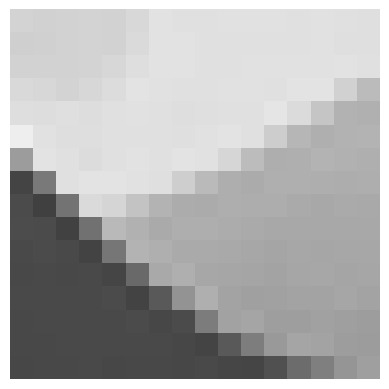

--
16
--


In [217]:
i, j = 5, 5
block = image[16*i:16*(i+1), 16*j:16*(j+1)]
show(block)
printf(extract_features(block))

In [218]:
def low_rank_approx(svd_result, rank):
    U, s, VT = svd_result

    U_low = np.copy(U)
    U_low = U_low[:, :rank]

    s_low = np.copy(s)
    s_low = s_low[:rank]

    VT_low = np.copy(VT)
    VT_low = VT_low[:rank]

    return U_low, s_low, VT_low

def compress(image, rank):
    U, s, VT = svd(image)
    U_low, s_low, VT_low = low_rank_approx((U, s, VT), rank)
    return product_svd((U_low, s_low, VT_low))

==== initial block ====


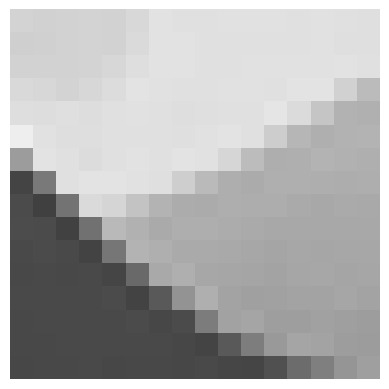

@ extracted feature of initial block: 
--
16
--
==== new block ====


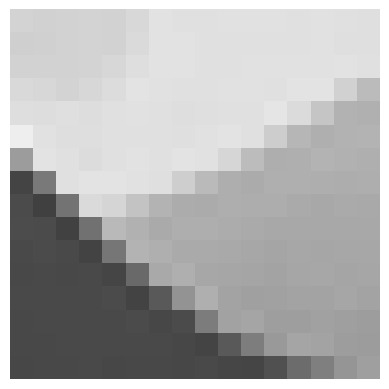

@ extracted feature of new block: 
--
15
--


In [219]:
new_block = compress(block, 15)
print("==== initial block ====")
show(block)
print("@ extracted feature of initial block: ")
printf(extract_features(block))
print("==== new block ====")
show(new_block)
print("@ extracted feature of new block: ")
printf(extract_features(new_block))

In [220]:
from math import log10, sqrt 
def calc_psnr(original, compressed): 
    '''peak signal-to-noise ratio'''
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [221]:
calc_psnr(block, new_block)

138.30920305134856

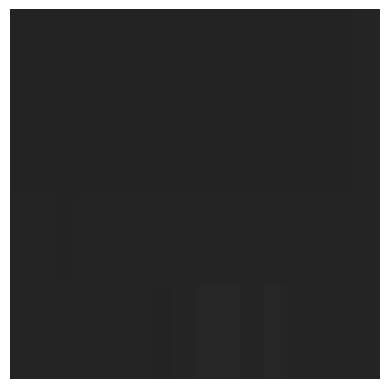

-
4
-


In [222]:
i, j = 1, 1
block = image[16*i:16*(i+1), 16*j:16*(j+1)]
show(block)
printf(extract_features(block))

==== initial block ====


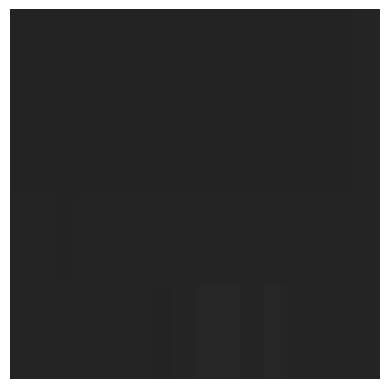

@ extracted feature of initial block: 
-
4
-
==== new block ====


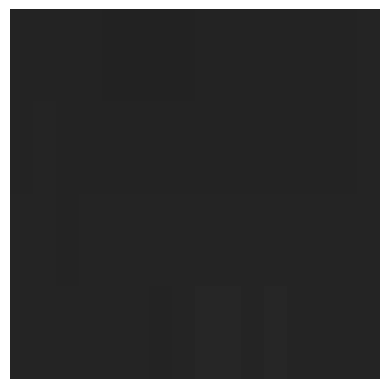

@ extracted feature of new block: 
-
3
-


In [223]:
new_block = compress(block, 3)
print("==== initial block ====")
show(block)
print("@ extracted feature of initial block: ")
printf(extract_features(block))
print("==== new block ====")
show(new_block)
print("@ extracted feature of new block: ")
printf(extract_features(new_block))

In [224]:
calc_psnr(block, new_block)

115.2946612407045

In [225]:
def embed_watermark(image, watermark):
    watermarked_image = np.copy(image)

    for i in range(image.shape[0] // 16):
        for j in range(image.shape[0] // 16):
            block = watermarked_image[16 * i : 16 * (i + 1), 16 * j : 16 * (j + 1)]
            feature = int(np.sum(extract_features(block)))
            if feature > 1 and (
                (feature % 2 == 0 and watermark[i, j] == 1)
                or (feature % 2 == 1 and watermark[i, j] == 0)
            ):
                new_block = compress(block, feature - 1)
                watermarked_image[16 * i : 16 * (i + 1), 16 * j : 16 * (j + 1)] = new_block

    return watermarked_image

==== original image ====


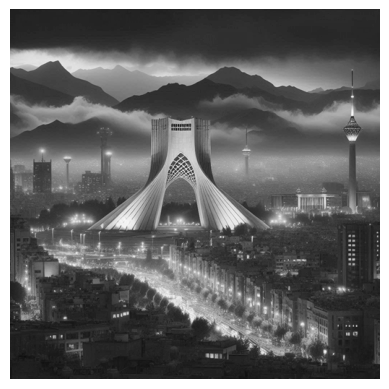

==== watermarked image ====


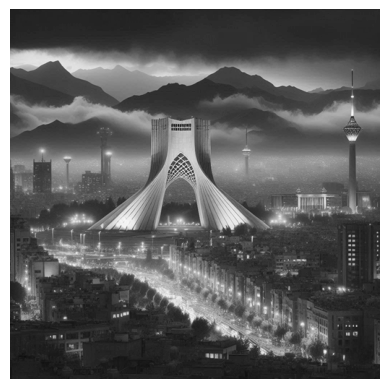

==== extracted watermark ====


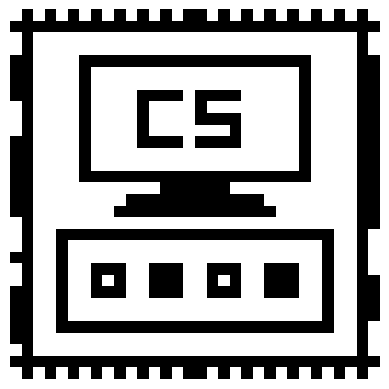

In [226]:
watermarked_image = embed_watermark(image, watermark)
print("==== original image ====")
show(image)
print("==== watermarked image ====")
show(watermarked_image)
print("==== extracted watermark ====")
show(extract_watermark(watermarked_image))

In [227]:
calc_psnr(image, watermarked_image)

123.15384461063968

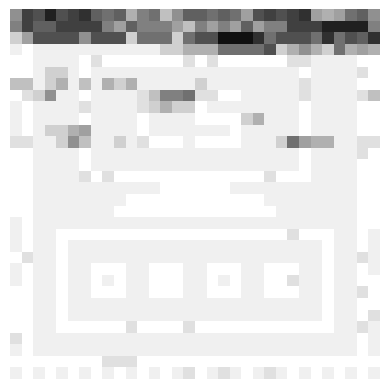

In [228]:
show(extract_features(watermarked_image)/ 16)

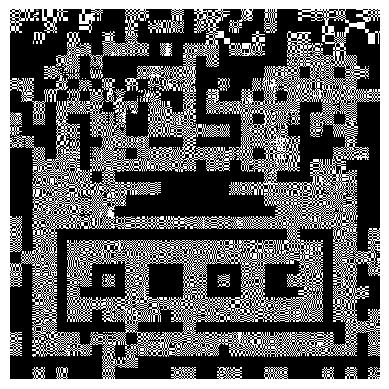

In [229]:
show((image - watermarked_image)*100000000)

# Using Smaller Blocks + PRNG

In [230]:
import random
print(random.random())
print(random.random())
print(random.random())

0.71435834230606
0.5319592802405712
0.8957577708257675


In [231]:
random.seed("this is a password 1234!")
print(random.random())
random.seed("this is a password 1234!")
print(random.random())
random.seed("this is a password 1234!")
print(random.random())

0.14455917926259487
0.14455917926259487
0.14455917926259487


In [232]:
random.seed("ANOTHER PASSWORD @#$%^ !")
print(random.random())
random.seed("ANOTHER PASSWORD @#$%^ !")
print(random.random())
random.seed("ANOTHER PASSWORD @#$%^ !")
print(random.random())

0.8243075556541342
0.8243075556541342
0.8243075556541342


In [233]:
BLOCK_SIZE = 16
BLOCKS = [(i,j) for i in range(0, 512, BLOCK_SIZE) for j in range(0, 512, BLOCK_SIZE)]
print(BLOCKS)
len(BLOCKS)

[(0, 0), (0, 16), (0, 32), (0, 48), (0, 64), (0, 80), (0, 96), (0, 112), (0, 128), (0, 144), (0, 160), (0, 176), (0, 192), (0, 208), (0, 224), (0, 240), (0, 256), (0, 272), (0, 288), (0, 304), (0, 320), (0, 336), (0, 352), (0, 368), (0, 384), (0, 400), (0, 416), (0, 432), (0, 448), (0, 464), (0, 480), (0, 496), (16, 0), (16, 16), (16, 32), (16, 48), (16, 64), (16, 80), (16, 96), (16, 112), (16, 128), (16, 144), (16, 160), (16, 176), (16, 192), (16, 208), (16, 224), (16, 240), (16, 256), (16, 272), (16, 288), (16, 304), (16, 320), (16, 336), (16, 352), (16, 368), (16, 384), (16, 400), (16, 416), (16, 432), (16, 448), (16, 464), (16, 480), (16, 496), (32, 0), (32, 16), (32, 32), (32, 48), (32, 64), (32, 80), (32, 96), (32, 112), (32, 128), (32, 144), (32, 160), (32, 176), (32, 192), (32, 208), (32, 224), (32, 240), (32, 256), (32, 272), (32, 288), (32, 304), (32, 320), (32, 336), (32, 352), (32, 368), (32, 384), (32, 400), (32, 416), (32, 432), (32, 448), (32, 464), (32, 480), (32, 496),

1024

In [234]:
PASSWORD = "Scientific Computing 1402-1403"
random.seed(PASSWORD)
blocks = random.choices(BLOCKS, k=32*32)
print(blocks)

[(464, 96), (304, 208), (128, 80), (304, 16), (496, 256), (128, 400), (192, 464), (352, 96), (144, 400), (336, 112), (80, 192), (432, 352), (96, 272), (288, 144), (32, 288), (352, 64), (416, 176), (464, 368), (96, 400), (48, 384), (16, 144), (208, 336), (48, 0), (400, 0), (0, 448), (208, 32), (496, 496), (352, 48), (416, 48), (352, 96), (128, 400), (112, 256), (128, 496), (32, 288), (384, 192), (112, 128), (112, 48), (272, 112), (16, 32), (464, 272), (304, 16), (464, 64), (384, 160), (128, 336), (368, 496), (16, 496), (256, 192), (496, 368), (112, 304), (320, 128), (80, 192), (144, 448), (160, 96), (464, 464), (16, 448), (48, 80), (272, 176), (320, 400), (208, 32), (368, 448), (192, 304), (112, 448), (496, 224), (304, 256), (352, 400), (336, 384), (64, 80), (400, 128), (32, 16), (0, 416), (64, 176), (288, 48), (160, 192), (96, 80), (336, 384), (480, 432), (400, 304), (160, 32), (480, 384), (208, 224), (288, 352), (96, 432), (448, 0), (176, 192), (32, 16), (320, 240), (496, 416), (384, 

In [235]:
def embed_watermark2(image, watermark, password):    
    random.seed(password)
    blocks = random.choices(BLOCKS, k=32 * 32)

    watermarked_image = np.copy(image)

    for i in range(32):
        for j in range(32):
            x, y = blocks[32 * i + j]
            block = watermarked_image[x : x + BLOCK_SIZE, y : y + BLOCK_SIZE]
            feature = int(np.sum(svd(block)[1] > 0.0001))
            if feature > 1 and (
                (feature % 2 == 0 and watermark[i, j] == 1)
                or (feature % 2 == 1 and watermark[i, j] == 0)
            ):
                new_block = compress(block, feature - 1)
                watermarked_image[x : x + BLOCK_SIZE, y : y + BLOCK_SIZE] = new_block
            print(x, y, feature, int(np.sum(svd(watermarked_image[x : x + BLOCK_SIZE, y : y + BLOCK_SIZE])[1] > 0.0001)))
            printf(watermarked_image[x : x + BLOCK_SIZE, y : y + BLOCK_SIZE])
    return watermarked_image

464 96 16 15
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
0.4  0.3  0.4  0.4  0.2  0.1  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1
0.4  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1
0.4  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.2  0.2  0.1  0.1
0.4  0.3  0.3  0.3  0.2  0.1  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1
0.4  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
0.4  0.4  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
0.4  0.4  0.4  0.5  0.4  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
0.4  0.5  0.5  0.5  0.4  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
0.4  0.4  0.4  0.4  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
0.3  0.3  0.2  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
0.4  0.4  0.2  0.2  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
0.4  0.4  0.2  0.3  0.3  0.2  0.2  0.2 

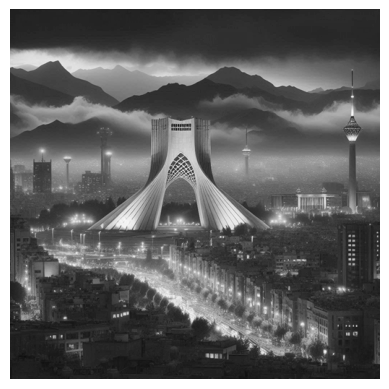

==== watermarked image ====


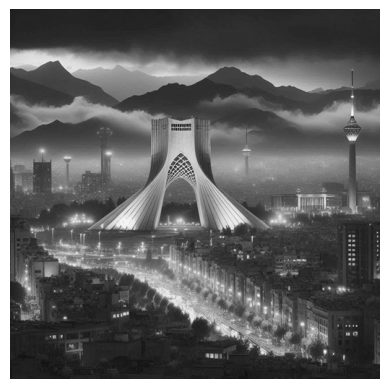

PSNR: 121.7417547552389


In [236]:
watermarked_image = embed_watermark2(image, watermark, PASSWORD)
print("==== original image ====")
show(image)
print("==== watermarked image ====")
show(watermarked_image)
print("PSNR:", calc_psnr(image, watermarked_image))

---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.2  0.2  0.1  0.1  0.2  0.1  0.1  0.1  0.2  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.2  0.1  0.1  0.1  0.1  0.1
0.1  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.2  0.2  0.1  0.1  0.1  0.1
0.1  0.1  0.2  0.2  0.1  0.1  0.1  0.2  0.1  0.1  0.1  0.2  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.

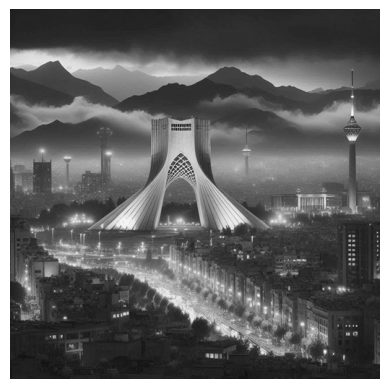

In [237]:
printf(watermarked_image[496:496+16,256:256+16])
show(watermarked_image)

In [238]:
def extract_watermark2(watermarked_image, password):
    random.seed(password)
    blocks = random.choices(BLOCKS, k=32 * 32)

    extracted_watermark = np.zeros((32, 32))

    for i in range(32):
        for j in range(32):
            x, y = blocks[32 * i + j]
            block = watermarked_image[x : x + BLOCK_SIZE, y : y + BLOCK_SIZE]
            feature = int(np.sum(svd(block)[1] > 0.0001))
            print(x, y, feature)
            extracted_watermark[i, j] = feature % 2

    return extracted_watermark

In [239]:
block = watermarked_image[496:496+16, 256:256+16]
int(np.sum(svd(block)[1] > 0.0001))

13

464 96 15
304 208 16
128 80 15
304 16 16
496 256 13
128 400 16
192 464 14
352 96 15
144 400 14
336 112 16
80 192 13
432 352 15
96 272 15
288 144 15
32 288 1
352 64 16
416 176 16
464 368 14
96 400 13
48 384 11
16 144 9
208 336 15
48 0 14
400 0 12
0 448 10
208 32 14
496 496 14
352 48 14
416 48 15
352 96 15
128 400 16
112 256 13
128 496 15
32 288 1
384 192 16
112 128 15
112 48 10
272 112 15
16 32 6
464 272 16
304 16 16
464 64 15
384 160 15
128 336 16
368 496 16
16 496 7
256 192 15
496 368 15
112 304 15
320 128 16
80 192 13
144 448 14
160 96 9
464 464 16
16 448 1
48 80 16
272 176 16
320 400 16
208 32 14
368 448 15
192 304 16
112 448 15
496 224 16
304 256 16
352 400 15
336 384 14
64 80 15
400 128 15
32 16 9
0 416 11
64 176 15
288 48 15
160 192 15
96 80 15
336 384 14
480 432 15
400 304 14
160 32 15
480 384 15
208 224 15
288 352 15
96 432 15
448 0 14
176 192 15
32 16 9
320 240 15
496 416 15
384 112 15
448 32 15
112 288 15
112 96 15
16 64 3
304 480 13
352 400 15
480 0 16
80 128 14
384 32 14
27

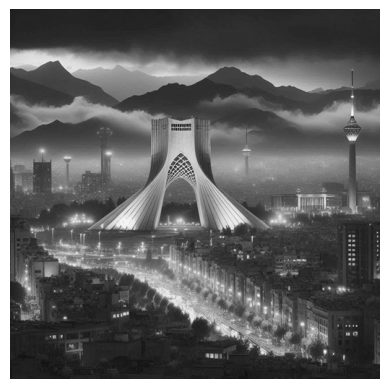

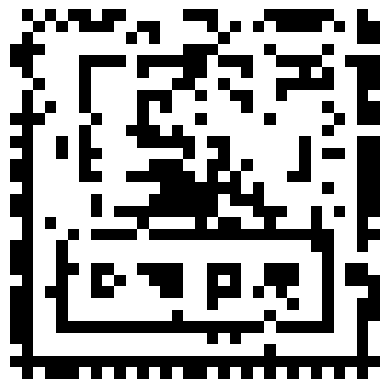

In [240]:
extracted_watermark = extract_watermark2(watermarked_image, PASSWORD)
show(watermarked_image)
show(extracted_watermark)

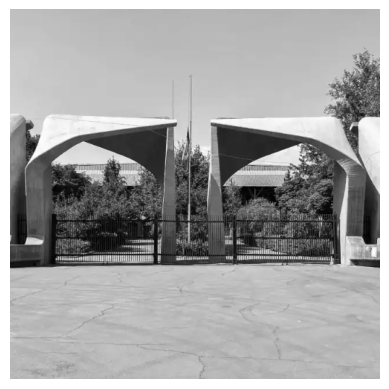

In [241]:
image = cv2.resize(to_gray(imread('640x640/4.png')), (512, 512))
show(image)

464 96 15 15
---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.8  0.8  0.8  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.8  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7 

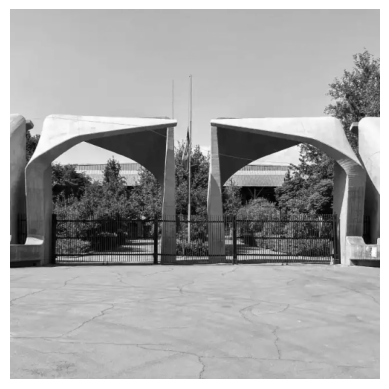

464 96 15
304 208 16
128 80 9
304 16 16
496 256 13
128 400 8
192 464 14
352 96 13
144 400 14
336 112 14
80 192 5
432 352 15
96 272 7
288 144 15
32 288 2
352 64 14
416 176 16
464 368 14
96 400 7
48 384 5
16 144 3
208 336 15
48 0 2
400 0 12
0 448 2
208 32 14
496 496 12
352 48 12
416 48 13
352 96 13
128 400 8
112 256 11
128 496 15
32 288 2
384 192 16
112 128 5
112 48 10
272 112 15
16 32 6
464 272 14
304 16 16
464 64 13
384 160 15
128 336 4
368 496 14
16 496 7
256 192 15
496 368 13
112 304 7
320 128 14
80 192 5
144 448 16
160 96 15
464 464 14
16 448 7
48 80 6
272 176 16
320 400 16
208 32 14
368 448 13
192 304 10
112 448 15
496 224 14
304 256 16
352 400 15
336 384 14
64 80 3
400 128 15
32 16 7
0 416 5
64 176 1
288 48 15
160 192 15
96 80 1
336 384 14
480 432 15
400 304 14
160 32 15
480 384 15
208 224 15
288 352 15
96 432 13
448 0 14
176 192 13
32 16 7
320 240 15
496 416 15
384 112 15
448 32 15
112 288 11
112 96 3
16 64 3
304 480 13
352 400 15
480 0 14
80 128 6
384 32 14
272 32 16
240 368 14


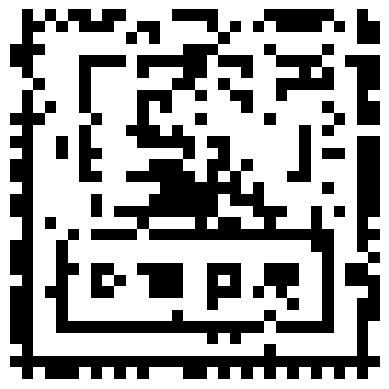

@ PSNR: 116.1212166075635


In [242]:
watermarked_image = embed_watermark2(image, watermark, PASSWORD)
show(watermarked_image)
show(extract_watermark2(watermarked_image, PASSWORD))
print("@ PSNR:", calc_psnr(watermarked_image, image))

## Resources
* https://www.researchgate.net/publication/339224683_Digital_Image_Watermarking_using_Singular_Value_Decomposition
* https://www.ijcaonline.org/ecot/number1/SPE134T.pdf
* https://link.springer.com/article/10.1007/s12046-012-0089-x